# **Data Analysis of Cricket Match Dataset: Test Nations (1877–2025):**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore") # Ignore warnings
import re

In [1]:
from data_analysis_pipeline import data_engineering

data= data_engineering()
data.shape

(7002, 19)

In [3]:
data.head()

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [4]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

## 1. **Match Count by Format:**

In [5]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [6]:
# 1. Match Count by Format: 
# Group by format and count matches
format_counts = data['format'].value_counts().reset_index()
format_counts.columns = ['Format', 'Count']

In [8]:
format_counts

,Format,Count
0,ODI,4130
1,Test,1790
2,T20I,1082


In [7]:
# Calculate percentages
total_matches = format_counts['Count'].sum()
format_counts['Percentage'] = (format_counts['Count'] / total_matches * 100).round(1)
format_counts

,Format,Count,Percentage
0,ODI,4130,59.0
1,Test,1790,25.6
2,T20I,1082,15.5


In [8]:
# Display the counts and percentages
print("Match Count by Format:")
print(format_counts)
print(f"Total Matches: {total_matches}")

Match Count by Format:
  Format  Count  Percentage
0   ODI    4130        59.0
1  Test    1790        25.6
2  T20I    1082        15.5
Total Matches: 7002


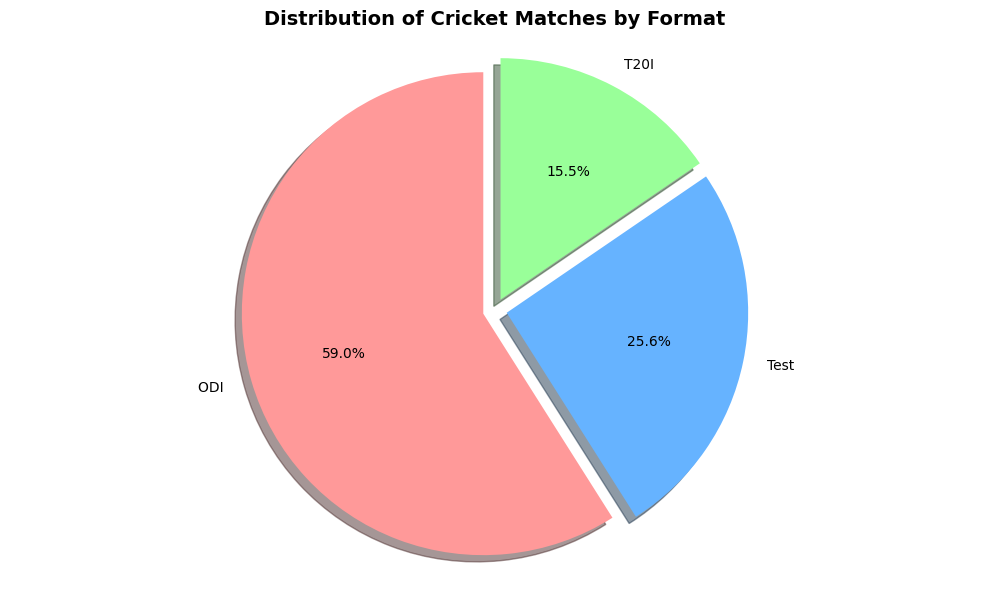

In [9]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(format_counts['Count'], 
        labels=format_counts['Format'], 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99'],
        explode=[0.05]*len(format_counts),
        shadow=True)
plt.title('Distribution of Cricket Matches by Format', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

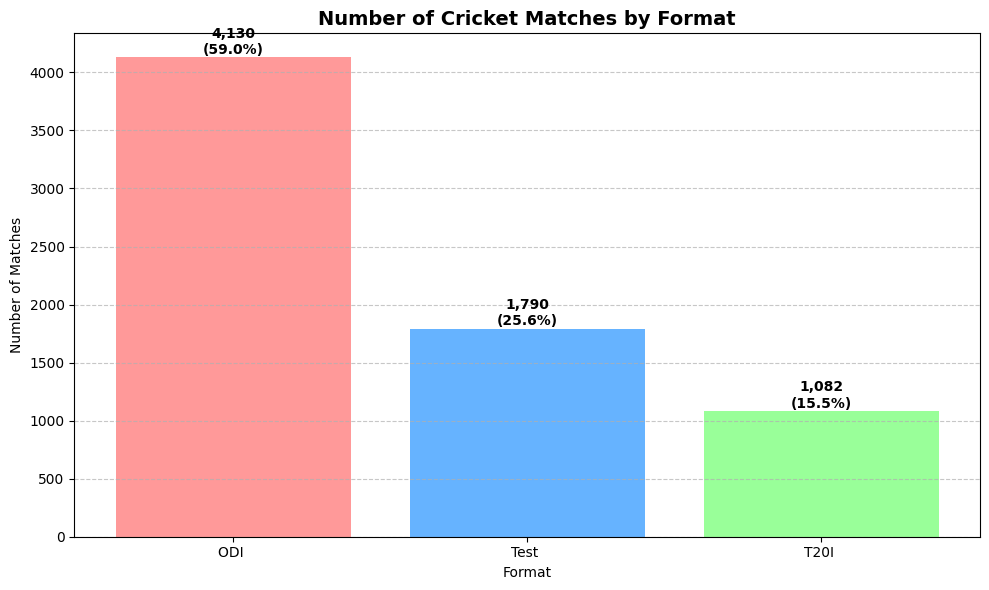

In [10]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(format_counts['Format'], format_counts['Count'], color=['#ff9999','#66b3ff','#99ff99'])

# Add count and percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:,}\n({height/total_matches:.1%})',
             ha='center', va='bottom', fontweight='bold')

plt.title('Number of Cricket Matches by Format', fontsize=14, fontweight='bold')
plt.xlabel('Format')
plt.ylabel('Number of Matches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart shows the distribution of cricket matches by format. ODI is the most played format with `4,130 matches (59%)`, followed by Test matches with 1,790 (25.6%), and T20I with 1,082 (15.5%). 

This indicates ODIs dominate cricket match formats.

In [11]:
# Conclusion
print("\nConclusion:")
most_played = format_counts.iloc[0]['Format']
print(f"The most played format is {most_played} with {format_counts.iloc[0]['Count']} matches ({format_counts.iloc[0]['Percentage']}% of total).")
print(f"This suggests that resource allocation should prioritize {most_played} matches, \n while still maintaining appropriate support for other formats.")


Conclusion:
The most played format is ODI  with 4130 matches (59.0% of total).
This suggests that resource allocation should prioritize ODI  matches, 
 while still maintaining appropriate support for other formats.


----

## 2. **Match Count Over Time:**

In [20]:
data.columns

Index(['team_1', 'team_2', 'winner', 'margin', 'ground', 'format',
       'test_score', 'odi_score', 't20i_score', 'start_date', 'year_month',
       'match_duration', 'year', 'month', 'ground_country',
       'is_neutral_ground', 'won_by_wickets', 'won_by_runs', 'won_by_inns'],
      dtype='object')

In [21]:
data.head(5)

,team_1,team_2,winner,margin,ground,format,test_score,odi_score,t20i_score,start_date,year_month,match_duration,year,month,ground_country,is_neutral_ground,won_by_wickets,won_by_runs,won_by_inns
2,India,Pakistan,India,6 wickets,Delhi,Test,1849,0,0,2007-11-22,2007-Nov,5,2007,Nov,India,False,6.0,0.0,False
3,Pakistan,India,Pakistan,341 runs,Karachi,Test,1783,0,0,2006-01-29,2006-Jan,4,2006,Jan,Pakistan,False,0.0,341.0,False
6,India,Pakistan,Pakistan,168 runs,Bengaluru,Test,1743,0,0,2005-03-24,2005-Mar,5,2005,Mar,India,False,0.0,168.0,False
7,India,Pakistan,India,195 runs,Eden Gardens,Test,1741,0,0,2005-03-16,2005-Mar,5,2005,Mar,India,False,0.0,195.0,False
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,Test,1697,0,0,2004-04-13,2004-Apr,4,2004,Apr,Pakistan,False,0.0,131.0,False


In [12]:
# Group by year and count matches
yearly_counts = data.groupby('year').size().reset_index(name= "Count")

# Display the first few rows to verify
print("Match Count by Year:")
print(yearly_counts)

Match Count by Year:
     year  Count
0       0     29
1    1877      2
2    1879      1
3    1880      1
4    1882      3
..    ...    ...
130  2021    192
131  2022    241
132  2023    227
133  2024    219
134  2025     53

[135 rows x 2 columns]


Here, `year= 0` means, `before 1877`.

In [ ]:
# Squeeze year= 0 to some hypothetical value say 1850 for better plotting experience
# Here, year=0 means before 1877. Otherwise a huge gap between 0 and 1877 makes x-axis hectic
#yearly_counts.loc[yearly_counts['year'] == 0, 'year'] = 1850

# Using repalce replace 0 by 1850 inplace= True:
yearly_counts['year'].replace(0, 1850, inplace=True)

In [ ]:
# Making permanant changes to year column: 
data["year"].replace(0, 1850, inplace=True)

In [16]:
data["year"].describe()

count    7002.000000
mean     2001.331477
std        23.397247
min      1850.000000
25%      1995.000000
50%      2006.000000
75%      2016.000000
max      2025.000000
Name: year, dtype: float64

Nice!

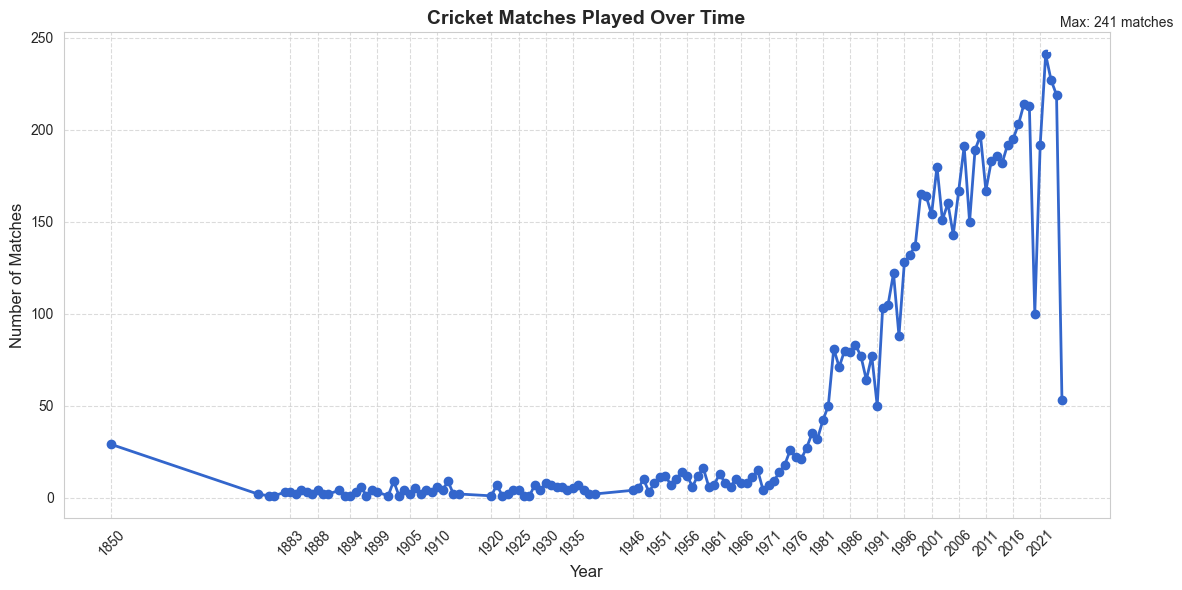

In [19]:
# Create a line chart for overall trend
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(yearly_counts['year'], yearly_counts['Count'], marker='o', linestyle='-', linewidth=2, color='#3366cc')

# Add title and labels
plt.title('Cricket Matches Played Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks
plt.xticks(yearly_counts['year'][::5], rotation=45)  # Show every 5th year

# Add annotations for significant points
max_year = yearly_counts.loc[yearly_counts['Count'].idxmax()]
min_year = yearly_counts.loc[yearly_counts['Count'].idxmin()]

plt.annotate(f'Max: {max_year["Count"]} matches', 
             xy=(max_year['year'], max_year['Count']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

The chart illustrates the number of cricket matches played over time. Initially, there were very few matches before 1950, with a gradual increase starting in the 1970s. A significant rise is observed from the 1990s onward, peaking around 2015 with 241 matches. 

The recent years show fluctuations, possibly due to external factors like scheduling changes or global events. This trend highlights the growing popularity of cricket over time, with a sharp increase in modern decades.

A decline from 1850s to 1883 in negligible as we have aggregated the number of matches played from the ancent time to 1880s with the year 1850. Consider that the curve is flat and overlaps with x-axis before 1880s.

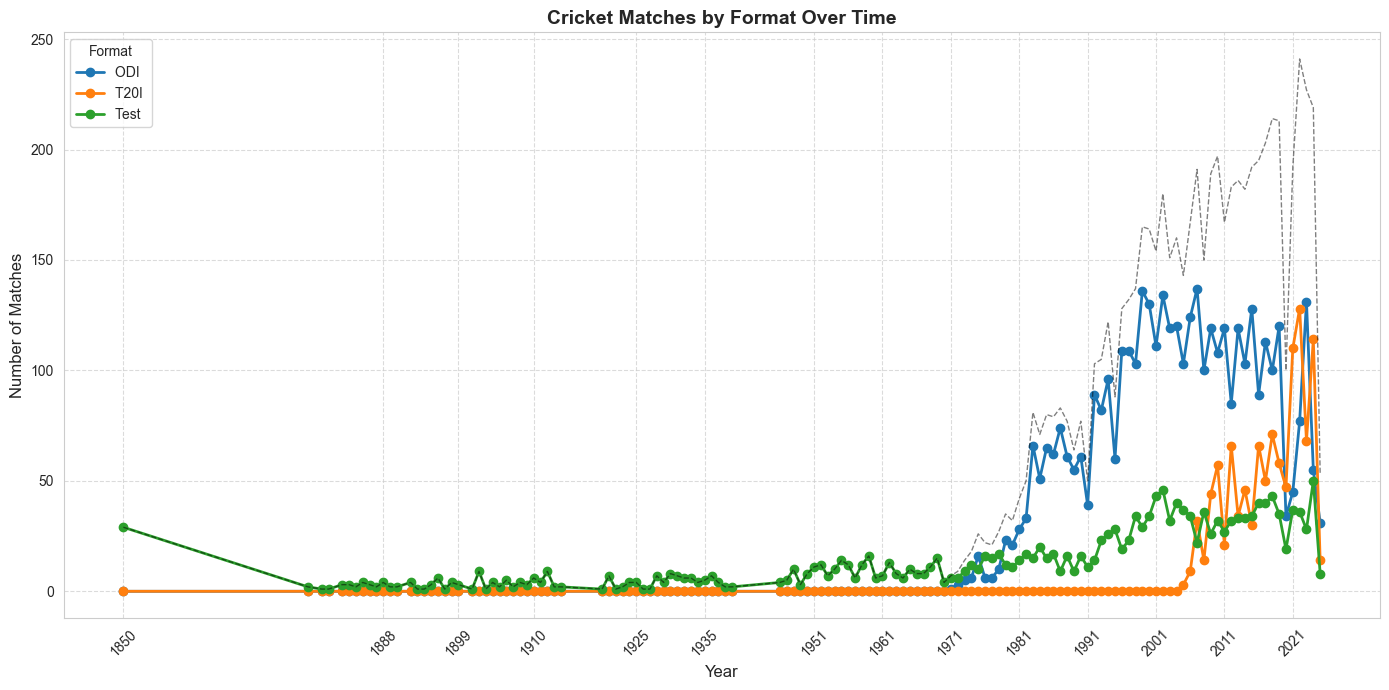

In [ ]:
# Create a line chart showing trends by format over time
format_yearly = data.groupby(['year', 'format']).size().reset_index(name='Count')

# Pivot the data for easier plotting
format_pivot = format_yearly.pivot(index='year', columns='format', values='Count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 7))
for column in format_pivot.columns:
    plt.plot(format_pivot.index, format_pivot[column], marker='o', linewidth=2, label=column)

plt.title('Cricket Matches by Format Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Format')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(format_pivot.index[::5], rotation=45)  # Show every 5th year

# Add a trend line for total matches
plt.plot(yearly_counts['year'], yearly_counts['Count'], 'k--', alpha=0.5, linewidth=1, label='Total')
# Improve x-axis ticks
plt.xticks(yearly_counts['year'][::10], rotation=45)  # Show every 5th year
plt.tight_layout()
plt.show()

The plot shows the number of cricket matches played over time, categorized by formats (`ODI`, `T20I`, and `Test`). 

1. **`Test Matches`**:   
Test cricket dominated the early years, starting in 1877 or before, with steady but low match counts until the 1970s. A gradual increase is observed post-1970, but the growth is slower compared to other formats.

2. **`ODI Matches`**:   
ODIs emerged in the 1970s and quickly gained popularity, surpassing Test matches by the 1980s. The format saw consistent growth, peaking around 2015, and remains the most played format.

3. **`T20I Matches`**:   
T20Is began in the early 2000s and experienced rapid growth, reflecting their increasing popularity. However, their match count remains lower than ODIs but has surpassed Test matches in recent years.

4. **`Overall Trends`**:   
The dashed line representing total matches shows a sharp increase from the 1990s, peaking around 2015. Recent fluctuations may be due to external factors like scheduling changes or global events.

This highlights the evolution of cricket formats, with ODIs dominating, T20Is growing rapidly, and Test matches maintaining a steady presence.

In [25]:
# Calculate growth rates
yearly_counts['Growth'] = yearly_counts['Count'].pct_change() * 100
yearly_counts

,year,Count,Growth
0,1850,29,NaN
1,1877,2,-93.103448
2,1879,1,-50.000000
3,1880,1,0.000000
4,1882,3,200.000000
...,...,...,...
130,2021,192,92.000000
131,2022,241,25.520833
132,2023,227,-5.809129
133,2024,219,-3.524229


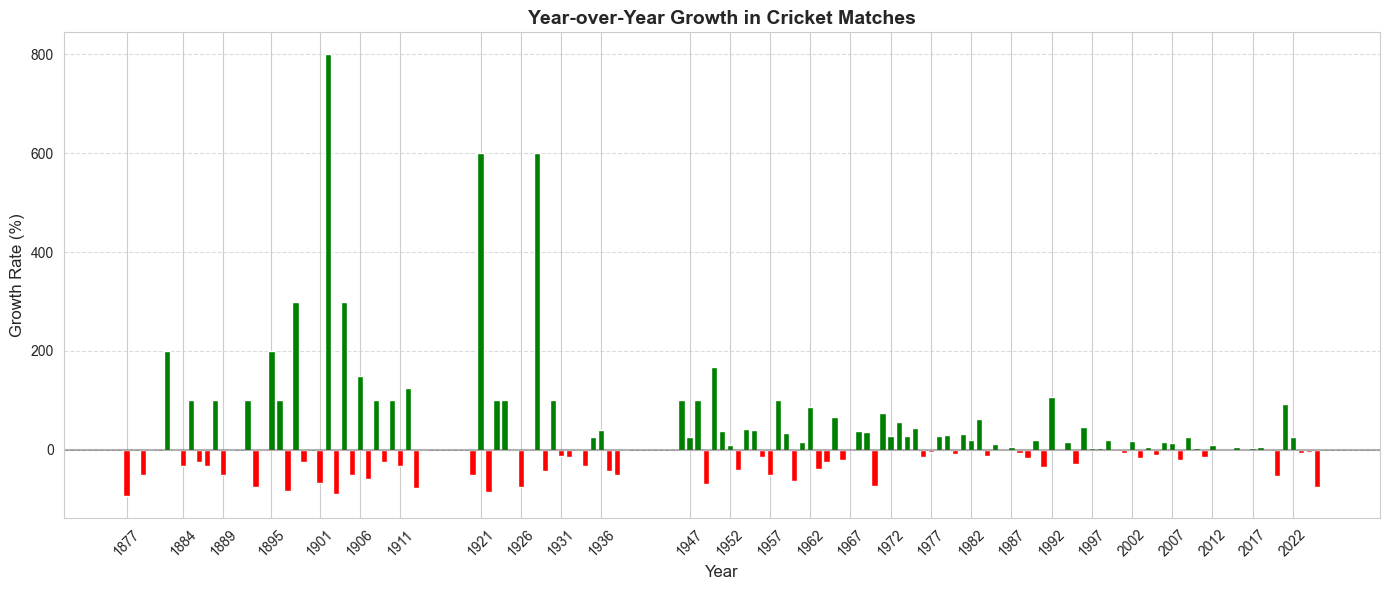

In [23]:
# Create a bar chart for year-over-year growth
plt.figure(figsize=(14, 6))
bars = plt.bar(yearly_counts['year'][1:], yearly_counts['Growth'][1:], 
        color=['g' if x > 0 else 'r' for x in yearly_counts['Growth'][1:]])

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Year-over-Year Growth in Cricket Matches', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(yearly_counts['year'][1::5], rotation=45)  # Show every 5th year

plt.tight_layout()
plt.show()

The bar chart illustrates the year-over-year growth rate of cricket matches.

1. **Positive Growth (Green Bars)**: 
   - Significant spikes in growth are observed in certain years, such as the early 1900s, 1920s, and post-1970s. These spikes may correspond to the introduction of new formats, increased scheduling, or global events boosting cricket's popularity.

   - The 1990s and early 2000s show consistent positive growth, reflecting the expansion of cricket formats like ODIs and the introduction of T20Is.

2. **Negative Growth (Red Bars)**:
   - Periods of decline are evident, particularly during global disruptions like World Wars (1914–1918, 1939–1945) and recent years (e.g., 2020s), possibly due to the COVID-19 pandemic or other scheduling challenges.

   - Negative growth indicates fewer matches played compared to the previous year.

3. **Fluctuations**:
   - The growth rate is highly volatile in the early years, likely due to the limited number of matches played annually.
   
   - In modern decades, growth stabilizes but still shows occasional dips, reflecting external factors affecting match scheduling.

**Conclusion**: The chart highlights the dynamic nature of cricket's growth, with periods of rapid expansion and occasional declines. Positive growth aligns with the introduction of new formats and increased global interest, while negative growth often coincides with global disruptions or scheduling constraints.

In [24]:
# Conclusion
recent_years = yearly_counts.tail(10)
avg_recent = recent_years['Count'].mean()
trend_direction = "increasing" if recent_years['Count'].iloc[-1] > recent_years['Count'].iloc[0] else "decreasing"

# Format-specific trends
format_recent = format_yearly[format_yearly['year'] >= yearly_counts['year'].max() - 10]
fastest_growing = format_recent.groupby('format')['Count'].sum().idxmax()

print("\nConclusion:")
print(f"The overall trend in cricket matches is {trend_direction} over the past decade.")
print(f"The average number of matches per year in the last decade is {avg_recent:.1f}.")
print(f"The format with the highest growth is {fastest_growing}, suggesting increased investment should be directed there.")
print("For optimal resource allocation, investment should follow the trend lines, with particular attention to formats showing consistent growth.")


Conclusion:
The overall trend in cricket matches is decreasing over the past decade.
The average number of matches per year in the last decade is 185.7.
The format with the highest growth is ODI , suggesting increased investment should be directed there.
For optimal resource allocation, investment should follow the trend lines, with particular attention to formats showing consistent growth.
